### Imports and Read Data

In [27]:
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import plotly.express as px
import folium
import matplotlib.pyplot as plt

In [2]:
census_data = pd.read_csv('/home/ec2-user/capstone/broadband-capstone/data/weighted_merged_all.csv')


In [3]:
census_data.columns

Index(['Zip', 'WiredCount_2020', 'Fwcount_2020', 'AllProviderCount_2020',
       'Wired25_3_2020', 'Wired100_3_2020', 'All25_3_2020', 'All100_3',
       'TestCount', 'AverageMbps', 'FastestAverageMbps',
       '%Access to Terrestrial Broadband',
       'Lowest Priced Terrestrial Broadband Plan', 'WiredCount_2015',
       'Fwcount_2015', 'AllProviderCount_2015', 'Wired25_3_2015',
       'Wired100_3_2015', 'All25_3_2015', 'All100_3.1',
       'Total_Enrolled_Households', 'ST', 'COUNTY NAME', 'BROADBAND USAGE',
       'ERROR RANGE (MAE)(+/-)', 'ERROR RANGE (95%)(+/-)', 'MSD',
       'median_age_overall', 'median_age_male', 'median_age_female',
       'employment_rate', 'median_income', 'total_households',
       'ave_household_size', 'ave_family_size', 'total_population',
       'median_house_value', 'pct_white', 'pct_hisp_latino', 'pct_black',
       'pct_native', 'pct_asian', 'pct_hi_pi', 'pct_other_race',
       'pct_two+_race', 'pct_rent_burdened', 'poverty_rate',
       'pct_pop_bach

---

### Visualize demographics against broadband accessibility

Relevant fields:
- pct_white, pct_hisp_latino, pct_black, pct_native, pct_asian, pct_hi_pi, pct_other_race, pct_two+_race
- pct_internet_broadband_any_type, pct_internet, pct_internet_dial_up, pct_internet_cellular, pct_only_cellular, pct_internet_broadband_fiber, pct_internet_broadband_satellite, pct_internet_only_satellite, pct_internet_other, pct_internet_no_subscrp, pct_internet_none

Expected Output:

| Zipcode | Dominant Ethnic Group | Percentage with Broadband Access |
| --- | --- | ---| 
| 63021 | White | 70% |
| 60654 | Black | 60% |


In [4]:
broadband_by_demographics = census_data[['Zip',
                                         'pct_white',
                                         'pct_hisp_latino', 
                                         'pct_black', 
                                         'pct_native', 
                                         'pct_asian', 
                                         'pct_hi_pi',
                                         'pct_other_race', 
                                         'pct_two+_race',
                                         'pct_internet_broadband_any_type']]

broadband_by_demographics.rename(columns = {'pct_white':'White',
                                          'pct_hisp_latino':'Hispanic/Latino', 
                                          'pct_black':'Black', 
                                          'pct_native':'Native American', 
                                          'pct_asian':'Asian', 
                                          'pct_hi_pi':'Hawaiian/Pacific Islander',
                                          'pct_other_race': 'Other', 
                                          'pct_two+_race': '2+ Races'}, 
                                 inplace = True)



/home/ec2-user/capstone/capstoneEnv/lib64/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [5]:
broadband_by_demographics['primary_ethnicity'] = broadband_by_demographics[['White',
                                                                           'Hispanic/Latino',
                                                                           'Black',
                                                                           'Native American',
                                                                           'Asian',
                                                                           'Hawaiian/Pacific Islander',
                                                                           'Other',
                                                                           '2+ Races']].idxmax(axis=1)

/home/ec2-user/capstone/capstoneEnv/lib64/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
bins = [0, 50, 75, 90, 100, np.inf]
names = ['<50%', '50-75%', '75-90%', '90-100%', 'impossible']

broadband_by_demographics['Broadband Accessibility'] = pd.cut(broadband_by_demographics['pct_internet_broadband_any_type'], 
                                                              bins, 
                                                              labels=names)

/home/ec2-user/capstone/capstoneEnv/lib64/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
grouped_demographics = broadband_by_demographics[['primary_ethnicity','Broadband Accessibility','Zip']].groupby(['primary_ethnicity','Broadband Accessibility'], observed=True).count()


In [11]:
grouped_demographics

Zip
primary_ethnicity         Broadband Accessibility       
2+ Races                  50-75%                       1
                          75-90%                       3
Asian                     <50%                         1
                          50-75%                      17
                          75-90%                      85
                          90-100%                     72
Black                     <50%                       103
                          50-75%                     880
                          75-90%                     381
                          90-100%                     49
Hawaiian/Pacific Islander 50-75%                       6
                          75-90%                       3
Hispanic/Latino           <50%                        53
                          50-75%                     763
                          75-90%                     787
                          90-100%                     96
Native American           <50%                       133
                          50-75%                     234
                          75-90%                       6
White                     <50%                       166
                          50-75%                    9225
                          75-90%                   16119
                          90-100%                   3440

In [15]:
grouped_demographics = broadband_by_demographics[['primary_ethnicity','Broadband Accessibility','Zip']].groupby(['primary_ethnicity','Broadband Accessibility'], observed=True).count()
grouped_demographics.rename(columns = {'Zip': 'counts'}, inplace=True)

grouped_demographics_pct = grouped_demographics.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack(level=1)
grouped_demographics_pct.columns = grouped_demographics_pct.columns.droplevel(0)

grouped_demographics_pct


Broadband Accessibility,50-75%,75-90%,<50%,90-100%
primary_ethnicity,,,,
2+ Races,25.000000,75.000000,NaN,NaN
Asian,9.714286,48.571429,0.571429,41.142857
Black,62.278839,26.963907,7.289455,3.467799
Hawaiian/Pacific Islander,66.666667,33.333333,NaN,NaN
Hispanic/Latino,44.908770,46.321366,3.119482,5.650383
Native American,62.734584,1.608579,35.656836,NaN
White,31.865285,55.678756,0.573402,11.882556


In [16]:
fig = px.bar(grouped_demographics_pct[['<50%','50-75%','75-90%','90-100%']], 
             barmode='group', 
             color_discrete_sequence=px.colors.qualitative.D3,
             title='Broadband Accesibility by Demographic Group')
fig.show()

---

### Plotting Accessibility by Zip Code

In [2]:
map = folium.Map()

map.choropleth(geo_data="../data/stanford-dc841dq9031-geojson.json")

/home/ec2-user/capstone/capstoneEnv/lib64/python3.7/site-packages/folium/folium.py:413: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [ ]:
map

---

### Median Income:

In [17]:
print(f"{round(len(census_data[census_data['median_income'].isna()])/len(census_data)*100,2)}% of the dataset is missing median income data.")


0.03% of the dataset is missing median income data.


In [21]:
print(f"{len(census_data[census_data.median_income==-666666666])} rows contain the -6666666 value")



0 rows contain the -6666666 value


In [22]:
filtered_median_income = census_data[~(census_data.median_income.isna()) & 
                                     (census_data.median_income!=-666666666)]['median_income']
filtered_median_income.describe()


count     32642.000000
mean      61827.512633
std       24669.079985
min           0.000000
25%       46470.734621
50%       56621.261294
75%       70492.494976
max      250001.000000
Name: median_income, dtype: float64

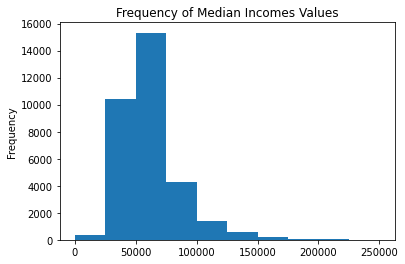

In [28]:
census_data[~(census_data.median_income.isna())]['median_income'].plot.hist(title='Frequency of Median Incomes Values')
plt.show()



---

### Poverty Rate

In [29]:
print(f"{round(len(census_data[census_data['poverty_rate'].isna()])/len(census_data)*100,2)}% of the dataset is missing poverty rate data.")


0.03% of the dataset is missing poverty rate data.


In [30]:
census_data['poverty_rate'].describe()

count    32642.000000
mean        13.614560
std          8.392302
min          0.000000
25%          7.772876
50%         11.770126
75%         17.394346
max        100.000000
Name: poverty_rate, dtype: float64

<AxesSubplot:ylabel='Frequency'>

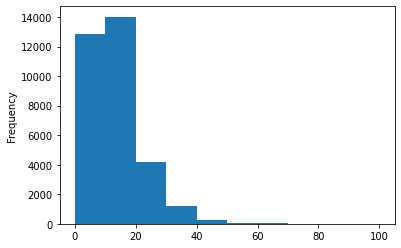

In [31]:
census_data['poverty_rate'].plot.hist()